1.Downloading the dataset

In [196]:
# !mkdir car_price_ds

In [197]:
# !pip install kaggle --upgrade

In [198]:
# !mkdir "~/.kaggle"

In [199]:
# !kaggle datasets download -d CooperUnion/cardataset

2.Exploratory data analysis

In [200]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
%matplotlib inline

In [201]:
def Handle_Categorical_Variables(df):
    # for loop over column in df 
    for element in df:
    #check if type of column is category      
        if((df[element].dtype)=='object') :
    #get all unique elements in column        
            unique=np.unique(df[element])
    #create label list    
            label= list(range(len(unique)))
    #replace the category to label   
            df=df.replace(unique,label)
    return df

In [202]:
# Handle_Categorical_Variables(df)

In [203]:
def plotting(pred,target):
    sns.distplot(pred, label='prediction')
    sns.distplot(target, label='target')
    plt.legend()

In [204]:
def Ridge_Model(train_features, train_labels,val_features, val_labels):
    model= Ridge(alpha=10, fit_intercept=True)
    model.fit(train_features, train_labels)
    print('Training Score: {}'.format(model.score(train_features, train_labels)))
    print('Validation Score: {}'.format(model.score(val_features, val_labels)))  

    val_pred = model.predict(val_features)
    mse = mean_squared_error(val_labels, val_pred)
    rmse = math.sqrt(mse)
    print('RMSE: {}'.format(rmse))
    
    return val_pred

In [205]:
def Linear_Model(train_features, train_labels,val_features, val_labels):
    model=LinearRegression()
    model.fit(train_features, train_labels)
    print('Training Score: {}'.format(model.score(train_features, train_labels)))
    print('Validation Score: {}'.format(model.score(val_features, val_labels)))  

    val_pred = model.predict(val_features)
    mse = mean_squared_error(val_labels, val_pred)
    rmse = math.sqrt(mse)
    print('RMSE: {}'.format(rmse))
    
    return val_pred

In [206]:
# Read Dataset
df = pd.read_csv('cardataset/data.csv')

In [207]:
# Check how many rows in df
df.shape

(11914, 16)

In [208]:
# • make — make of a car (BMW, Toyota, and so on)
# • model — model of a car
# • year — year when the car was manufactured
# • engine_fuel_type — type of fuel the engine needs (diesel, electric, and so on)
# • engine_hp — horsepower of the engine
# • engine_cylinders — number of cylinders in the engine
# • transmission_type — type of transmission (automatic or manual)
# • driven_wheels — front, rear, all
# • number_of_doors — number of doors a car has
# • market_category — luxury, crossover, and so on
# • vehicle_size — compact, midsize, or large
# • vehicle_style — sedan or convertible
# • highway_mpg — miles per gallon (mpg) on the highway
# • city_mpg — miles per gallon in the city
# • popularity — number of times the car was mentioned in a Twitter stream
# • msrp — manufacturer’s suggested retail price => [target variable]

In [209]:
# look at the first five rows of our df & transpose it to see all the elements
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335,300,300,230,230
Engine Cylinders,6,6,6,6,6
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2,2,2,2,2
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [211]:
# Normalize both names of col and names of content in col : space->_ & capital -> lower
# 1. normalize name of columns
df.columns = df.columns.str.lower().str.replace(' ','_')
# 2. normalize the name of content of columns
#2.a select the string col only
string_col = list(df.dtypes[df.dtypes == 'object'].index)
#2.b for loop and normalize 
for col in string_col:
    df[col] = df[col].str.lower().str.replace(' ','_')
    
df.head().T    

,0,1,2,3,4
make,bmw,bmw,bmw,bmw,bmw
model,1_series_m,1_series,1_series,1_series,1_series
year,2011,2011,2011,2011,2011
engine_fuel_type,premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required)
engine_hp,335,300,300,230,230
engine_cylinders,6,6,6,6,6
transmission_type,manual,manual,manual,manual,manual
driven_wheels,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive
number_of_doors,2,2,2,2,2
market_category,"factory_tuner,luxury,high-performance","luxury,performance","luxury,high-performance","luxury,performance",luxury


Checking messing values

In [212]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [213]:
# inplace parameter is set to True, in that case the dropna() method does the removing in the original DataFrame instead.
df.dropna(inplace=True)
# df.fillna(1)
df.shape

(8084, 16)

Handle Categorical Variables

In [214]:
del df['model']
del df['market_category']

In [215]:
df = Handle_Categorical_Variables(df)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8084 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               8084 non-null   int64  
 1   year               8084 non-null   int64  
 2   engine_fuel_type   8084 non-null   int64  
 3   engine_hp          8084 non-null   float64
 4   engine_cylinders   8084 non-null   float64
 5   transmission_type  8084 non-null   int64  
 6   driven_wheels      8084 non-null   int64  
 7   number_of_doors    8084 non-null   float64
 8   vehicle_size       8084 non-null   int64  
 9   vehicle_style      8084 non-null   int64  
 10  highway_mpg        8084 non-null   int64  
 11  city_mpg           8084 non-null   int64  
 12  popularity         8084 non-null   int64  
 13  msrp               8084 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 947.3 KB


In [217]:
df.head().T

,0,1,2,3,4
make,5.0,5.0,5.0,5.0,5.0
year,2011.0,2011.0,2011.0,2011.0,2011.0
engine_fuel_type,6.0,6.0,6.0,6.0,6.0
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,3.0,3.0,3.0,3.0,3.0
driven_wheels,3.0,3.0,3.0,3.0,3.0
number_of_doors,2.0,2.0,2.0,2.0,2.0
vehicle_size,0.0,0.0,0.0,0.0,0.0
vehicle_style,8.0,6.0,8.0,8.0,6.0


In [218]:
df.describe()

,make,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
count,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8.084000e+03
mean,22.067912,2012.058634,5.878649,274.642751,5.778080,1.346858,1.683201,3.414151,1.018308,7.509030,26.650915,19.553686,1499.397823,5.007267e+04
std,14.395673,6.317981,1.367875,115.003475,1.886088,0.893944,1.159530,0.898087,0.877453,5.031687,7.720473,7.159964,1413.855615,7.029313e+04
min,0.000000,1990.000000,0.000000,55.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,9.000000,2010.000000,5.000000,192.000000,4.000000,1.000000,0.000000,2.000000,0.000000,3.000000,22.000000,16.000000,549.000000,2.591875e+04
50%,20.000000,2015.000000,6.000000,264.000000,6.000000,1.000000,2.000000,4.000000,1.000000,8.000000,26.000000,18.000000,1013.000000,3.500500e+04
75%,33.000000,2016.000000,7.000000,320.000000,6.000000,1.000000,3.000000,4.000000,2.000000,14.000000,30.000000,22.000000,2009.000000,4.872250e+04
max,46.000000,2017.000000,7.000000,1001.000000,16.000000,4.000000,3.000000,4.000000,2.000000,15.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [219]:
df.sample(5)

,make,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
5120,20,2013,6,328.0,6.0,1,0,4.0,2,14,25,18,190,34550
8379,44,2017,7,194.0,4.0,1,0,4.0,2,3,30,34,2031,29030
11372,36,2010,7,158.0,4.0,3,2,4.0,0,2,28,21,210,20875
9768,9,2015,7,138.0,4.0,3,2,4.0,0,2,35,26,1385,16455
8313,23,2015,3,510.0,8.0,1,1,4.0,1,3,19,13,258,186495


In [220]:
df.shape

(8084, 14)

Analyze Target value

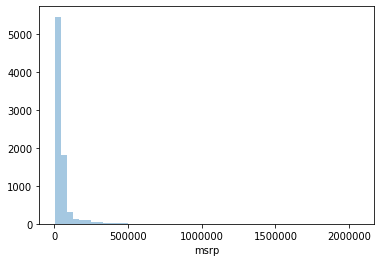

In [221]:
# look at what the values of y look like
sns.distplot(df.msrp,kde=False)
# The kde parameter is set to False to disable the Kernel Density Plot along with the distplot.

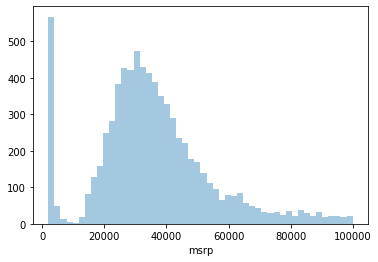

In [222]:
#This is a long tail distribution,which is a typical situation for prices,many cars with low prices and very few expensive ones
# zooming in a bit and looking at values below 100,000
sns.distplot(df.msrp[df.msrp < 100000],kde=False)

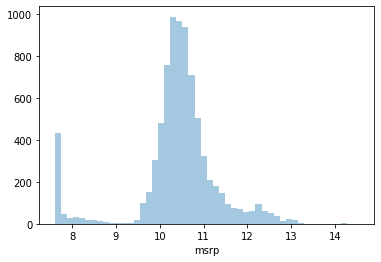

In [223]:
#Use log function to target value :The effect of the long tail is removed,and we see the entire distribution in one plot.
log_target = np.log1p(df.msrp)
sns.distplot(log_target,kde=False)

create features and labels from dataframe

In [224]:
df_labels = df['msrp'] 
df_features = df
del df_features['msrp']

Splitting Data into validation, test, and training sets

In [225]:
train_features, test_features, train_labels, test_labels=train_test_split(df_features,df_labels,test_size=0.2,random_state=1)
train_features, val_features, train_labels, val_labels=train_test_split(train_features,train_labels,test_size=0.2,random_state=1)

Validating the model

Use Ridge Regression

In [226]:
val_pred=Ridge_Model(train_features, train_labels,val_features, val_labels)

Training Score: 0.5171233998065027
Validation Score: 0.3993159396950051
RMSE: 76794.56591263617


Plot predict and target values

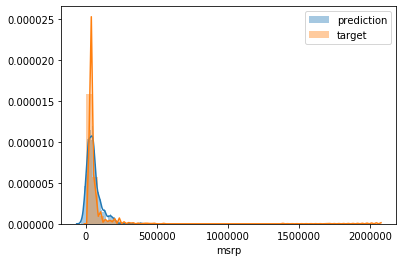

In [227]:
plotting(val_pred,val_labels)

linear regression model

In [228]:
val_pred=Linear_Model(train_features, train_labels,val_features, val_labels)

Training Score: 0.517123773247741
Validation Score: 0.3993560031823744
RMSE: 76792.0049079192


Plot predict and target values

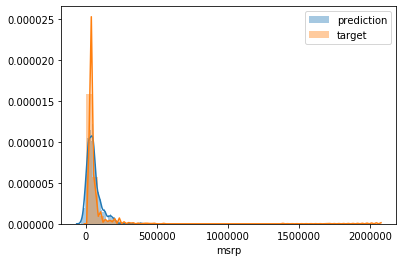

In [229]:
plotting(val_pred,val_labels)

Use log function

In [230]:
train_features = np.log1p(train_features)
train_labels = np.log1p(train_labels)
val_features = np.log1p(val_features)
val_labels = np.log1p(val_labels)

In [231]:
val_pred=Ridge_Model(train_features, train_labels,val_features, val_labels)

Training Score: 0.6122931893849155
Validation Score: 0.6254361375299753
RMSE: 0.5864134517130695


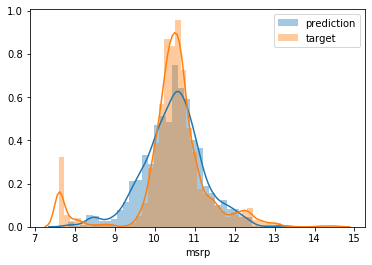

In [232]:
plotting(val_pred,val_labels)

In [233]:
val_pred=Linear_Model(train_features, train_labels,val_features, val_labels)

Training Score: 0.7675605160938336
Validation Score: 0.7569486420136766
RMSE: 0.4723783801586106


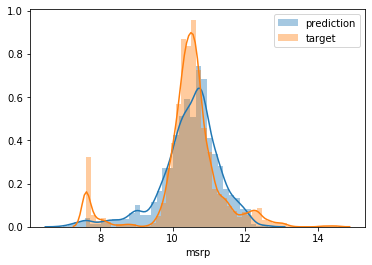

In [234]:
plotting(val_pred,val_labels)

Simple feature engineering

In [235]:
# create a new feature, "age" from the feature "year"

In [236]:
df_features.year.max()

2017

In [237]:
train_features['age'] = np.log1p(2017) - train_features.year
val_features['age'] = np.log1p(2017) - val_features.year

In [238]:
val_pred=Ridge_Model(train_features, train_labels,val_features, val_labels)

Training Score: 0.6131358432242104
Validation Score: 0.6262199454730426
RMSE: 0.5857995694404518


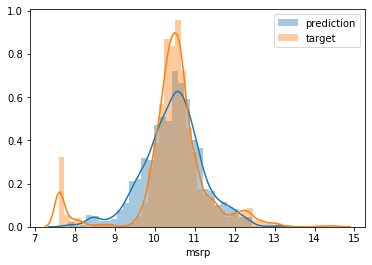

In [239]:
plotting(val_pred,val_labels)

In [240]:
val_pred=Linear_Model(train_features, train_labels,val_features, val_labels)

Training Score: 0.7675605160938099
Validation Score: 0.7569486420136486
RMSE: 0.47237838015863787


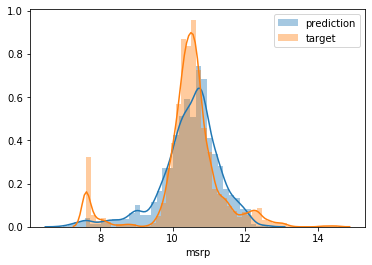

In [241]:
plotting(val_pred,val_labels)

use test data with our best model

In [242]:
test_features = np.log1p(test_features)
test_labels = np.log1p(test_labels)

test_features['age'] = np.log1p(2017) - test_features.year


In [243]:
test_pred=Linear_Model(train_features, train_labels,test_features, test_labels)

Training Score: 0.7675605160938099
Validation Score: 0.7612197856045988
RMSE: 0.466297730379458


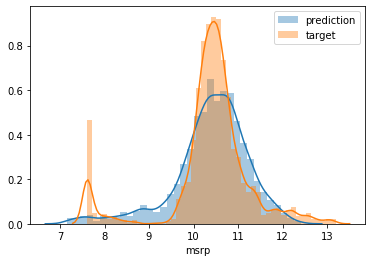

In [244]:
plotting(test_pred,test_labels)

In [245]:
suggestion_prices = np.expm1(test_pred)
suggestion_prices

array([ 28391.78562548,  67454.52800821,  15265.74861915, ...,
       159507.53003243,  18774.59484487,  42706.64795216])

In [246]:
real_prices = np.expm1(test_labels)
real_prices

4788     23225.0
4474     55305.0
11814    15945.0
39        2000.0
10879    31010.0
          ...   
2495     33895.0
7551     66700.0
11388    95895.0
1171     17395.0
6456     41700.0
Name: msrp, Length: 1617, dtype: float64